# Tugas Praktikum

<h2>Deskripsi Tugas<h2>


1.   Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2.   Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3.   Lakukan feature scaling jika diperlukan.
4.   Buat model multiple linear regression menggunakan Scikit-Learn.
5.   Latih model pada data latih dan lakukan prediksi pada data uji.
6.   Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.






Import Library

In [17]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

Load Dataset

In [8]:
df = pd.read_csv('assets/dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Encoding

In [10]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

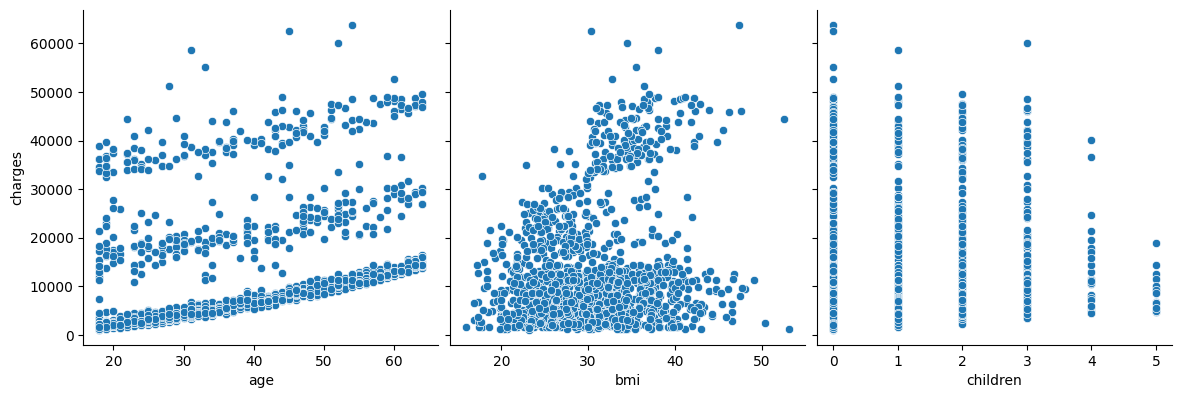

In [11]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')

<Axes: >

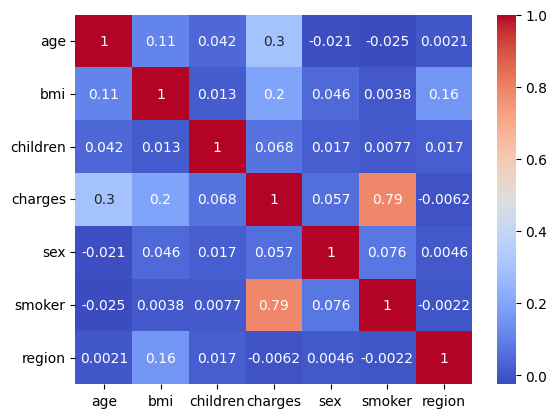

In [14]:
corr = df[['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Split Data

In [15]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Feature Scalling

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Modelling

In [20]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

Predict

In [21]:
y_pred = linear_model.predict(x_test_scaled)

Evaluate Model

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE Score : {mse}')
print(f'R2 Score : {r2_score}')
print(f'MAE Score : {mae}')

MSE Score : 31845929.134159446
R2 Score : 0.7998747145449958
MAE Score : 3930.333273901142


Visualize

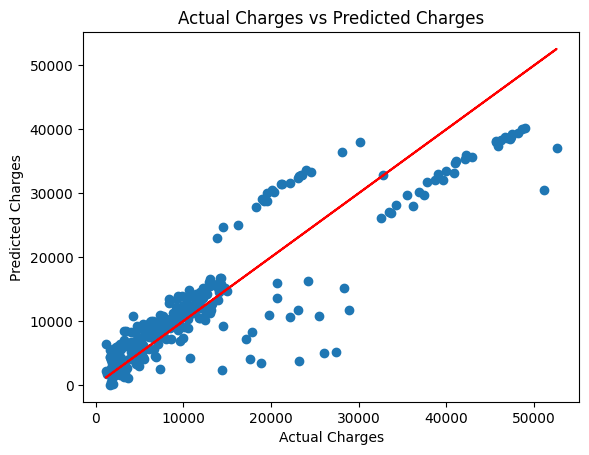

In [23]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,'r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()